In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statistics as stats
from statsmodels.stats import weightstats
from datetime import datetime
import sklearn.preprocessing as preproc

In [3]:
df_training = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [4]:
df_training.head(10)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
5,2006-01-10,79.00,79.01,78.08,78.53,1919900,MMM
6,2006-01-11,78.44,78.66,77.84,78.37,1911900,MMM
7,2006-01-12,78.20,78.23,77.20,77.70,2121100,MMM
8,2006-01-13,76.95,78.20,76.95,77.50,1925300,MMM
9,2006-01-17,77.10,77.62,77.00,77.09,2073400,MMM


In [5]:
df_training.tail(10)

,Date,Open,High,Low,Close,Volume,Name
93602,2017-12-15,69.35,70.54,68.66,70.29,19517623,AABA
93603,2017-12-18,70.54,70.74,69.95,70.14,6776982,AABA
93604,2017-12-19,69.70,70.36,69.38,70.21,14654994,AABA
93605,2017-12-20,70.60,71.05,70.17,70.90,12888149,AABA
93606,2017-12-21,71.00,72.17,70.88,71.59,9682733,AABA
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA
93611,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA


In [6]:
df_training.shape

(93612, 7)

In [7]:
#import seaborn as sns
#sns.pairplot(df_train)

In [8]:
df_training.isnull().any()

Date      False
Open       True
High       True
Low        True
Close     False
Volume    False
Name      False
dtype: bool

In [9]:
df_training.isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [10]:
df_training = df_training.dropna(axis=0)

In [11]:
df_training.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93587.000000,93587.000000,93587.000000,9.358700e+04
mean,85.623260,86.382961,84.836485,85.634973,2.015982e+07
std,108.151723,108.962620,107.227791,108.130598,3.442490e+07
min,6.750000,7.170000,0.000000,6.660000,8.708300e+04
25%,33.950000,34.290000,33.600000,33.950000,5.040876e+06
50%,60.040000,60.620000,59.490000,60.040000,9.702410e+06
75%,94.000000,94.740000,93.250000,94.000000,2.075386e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


In [12]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93587 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93587 non-null  object 
 1   Open    93587 non-null  float64
 2   High    93587 non-null  float64
 3   Low     93587 non-null  float64
 4   Close   93587 non-null  float64
 5   Volume  93587 non-null  int64  
 6   Name    93587 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.7+ MB


In [14]:
df_training.iloc[:, 4]

0        79.11
1        78.71
2        77.99
3        78.63
4        79.02
         ...  
93607    71.58
93608    69.86
93609    70.06
93610    69.82
93611    69.85
Name: Close, Length: 93587, dtype: float64

In [15]:
df_training = df_training.iloc[:, 4].values

In [16]:
type(df_training)

numpy.ndarray

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
df_training = scaler.fit_transform(df_training.reshape(-1, 1))

In [20]:
x_df_training = []

y_df_training =[]

In [21]:
for i in range(40, len(df_training)):
    x_df_training.append(df_training[i-40:i, 0])
    y_df_training.append(df_training[i, 0])

In [22]:
x_df_training = np.array(x_df_training)

y_df_training = np.array(y_df_training)

In [23]:
print(x_df_training.shape)

print(y_df_training.shape)

(93547, 40)
(93547,)


In [24]:
x_df_training = np.reshape(x_df_training, (x_df_training.shape[0],x_df_training.shape[1],1))

In [25]:
print(x_df_training.shape)

(93547, 40, 1)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [27]:
rnn = Sequential()

In [28]:
rnn.add(LSTM(units = 32, return_sequences = True, input_shape = (x_df_training.shape[1], 1)))

In [29]:
rnn.add(Dropout(0.2))

In [30]:
rnn.add(LSTM(units = 32, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 32, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 32))

rnn.add(Dropout(0.2))

In [31]:
rnn.add(Dense(units = 1))

In [32]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
rnn.fit(x_df_training, y_df_training, epochs = 100, batch_size = 32)

Epoch 1/100
2924/2924 [==============================] - 263s 85ms/step - loss: 4.6270e-04
Epoch 2/100
2924/2924 [==============================] - 250s 85ms/step - loss: 2.7288e-04
Epoch 3/100
2924/2924 [==============================] - 251s 86ms/step - loss: 2.3358e-04
Epoch 4/100
2924/2924 [==============================] - 251s 86ms/step - loss: 2.0987e-04
Epoch 5/100
2924/2924 [==============================] - 251s 86ms/step - loss: 1.9811e-04
Epoch 6/100
2924/2924 [==============================] - 249s 85ms/step - loss: 1.7745e-04
Epoch 7/100
2924/2924 [==============================] - 233s 80ms/step - loss: 1.7062e-04
Epoch 8/100
2924/2924 [==============================] - 242s 83ms/step - loss: 1.6250e-04
Epoch 9/100
2924/2924 [==============================] - 245s 84ms/step - loss: 1.5006e-04
Epoch 10/100
2924/2924 [==============================] - 242s 83ms/step - loss: 1.5292e-04
Epoch 11/100
2924/2924 [==============================] - 239s 82ms/step - loss: 1.4655e-

In [35]:
df_test = pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')

In [37]:
df_test.isnull().any()

Date      False
Open       True
High       True
Low        True
Close     False
Volume    False
Name      False
dtype: bool

In [38]:
df_test.isnull().sum()

Date       0
Open      24
High       9
Low       19
Close      0
Volume     0
Name       0
dtype: int64

In [39]:
df_test = df_test.dropna(axis=0)

In [41]:
df_test.head(2)

,Date,Open,High,Low,Close,Volume,Name
0,2017-01-03,178.83,180.0,177.22,178.05,2510055,MMM
1,2017-01-04,178.03,178.9,177.61,178.32,1541985,MMM


In [40]:
df_test.iloc[:, 4]

0       178.05
1       178.32
2       177.71
3       178.23
4       177.27
         ...  
7776     71.58
7777     69.86
7778     70.06
7779     69.82
7780     69.85
Name: Close, Length: 7757, dtype: float64

In [43]:
df_test = df_test.iloc[:, 4].values

In [44]:
print(df_test.shape)

(7757,)


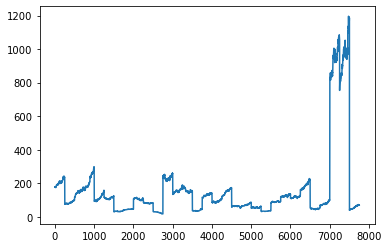

In [45]:
plt.plot(df_test)

In [47]:
unscaled_df_training = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')
unscaled_df_test =  pd.read_csv('all_stocks_2017-01-01_to_2018-01-01.csv')

In [48]:
df=pd.concat((unscaled_df_training['Close'],unscaled_df_test['Close']), axis = 0)

In [49]:
x_df_test = df[len(df)-len(df_test)-40:].values

In [50]:
len(x_df_test)

7797

In [51]:
x_df_test = np.reshape(x_df_test, (-1, 1))

In [52]:
x_df_test = scaler.transform(x_df_test)

In [53]:
all_x_df_test = []

for i in range(40, len(x_df_test)):

    all_x_df_test.append(x_df_test[i-40:i, 0])

all_x_df_test = np.array(all_x_df_test)

In [54]:
all_x_df_test = np.reshape(all_x_df_test, (all_x_df_test.shape[0], all_x_df_test.shape[1],1))

In [55]:
predictions = rnn.predict(all_x_df_test)

243/243 [==============================] - 14s 38ms/step


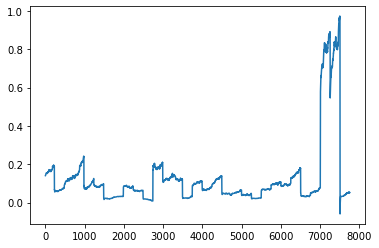

In [56]:
plt.plot(predictions) 

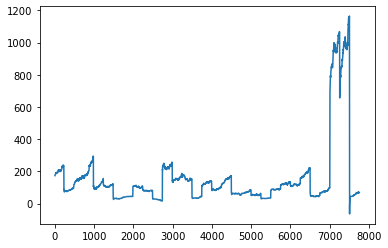

In [57]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions)

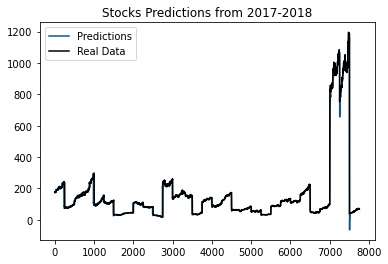

In [58]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(df_test, color = 'black', label = "Real Data")

plt.title('Stocks Predictions from 2017-2018')

plt.legend()

In [60]:
print("The stock trading prediction for jan 2017: ",unscaled_predictions[0])
print("The real stock trading prediction for jan 2017: ",df_test[0])

The stock trading prediction for first jan 2017-2018:  [173.73262]
The real stock trading prediction for first jan 2017-2018:  178.05


In [61]:
print("The last trading day price prediction is for Dec 2017 is: ",unscaled_predictions[20])
print("The real last trading day price for Dec 2017 is: ",df_test[20])

The last trading day price prediction is for Dec 2017 is:  [187.03514]
The real last trading day price for Dec 2017 is:  175.17
